<a href="https://colab.research.google.com/github/JulieWang417/DS-Unit-1-Build/blob/master/Julie_Wang_Unit1_build_week_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We wondered: If “The Empire Strikes Back” is clearly the best of the bunch?

We needed to addressing this question. To do this, I downloaded the data from  GitHub repository fivethirtyeight/data.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/JulieWang417/data/master/star-wars-survey/StarWars.csv'
star_wars = pd.read_csv(url, error_bad_lines=False, encoding="ISO-8859-1")
# We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding.

print(star_wars.shape)
star_wars.head()


(1187, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data has several columns, including:

**RespondentID** - An anonymized ID for the respondent (person taking the survey)
**Gender** - The respondent's gender

**Age** - The respondent's age

**Household Income** - The respondent's income

**Education** - The respondent's education level

**Location** (Census Region) - The respondent's location

**Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response

**Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. 

For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [0]:
# Remove any rows where RespondentID is NaN
star_wars=star_wars[star_wars["RespondentID"].notnull()]

In [4]:
yes_no={"Yes":True,"No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)
# dropna=False, we can also see NaN index values.
# normalize=True, returns the relative frequency by dividing all values by the sum of values.

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)
# pandas.Series.map, Used for substituting each value in a Series with another value

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
star_wars.shape

(1186, 38)

In [0]:
# Rename each of the columns above so the names are more intuitive
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
})

In [0]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

In [0]:

star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia Organa",
        "Unnamed: 18": "Anakin Skywalker",
        "Unnamed: 19": "Obi Wan Kenobi",
        "Unnamed: 20": "Emperor Palpatine",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2 D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme Amidala",
        "Unnamed: 28": "Yoda"
        })

In [0]:
star_wars = star_wars.drop(['Are you familiar with the Expanded Universe?',
                            'Do you consider yourself to be a fan of the Expanded Universe?æ',
                            'Do you consider yourself to be a fan of the Star Trek franchise?',
                            'Which character shot first?'],axis=1)

In [12]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male,18-29,"$0 - $24,999",High school degree,West North Central


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question. For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [0]:
# We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": 1,
    np.nan: 0,
    "Star Wars: Episode II  Attack of the Clones": 1,
    "Star Wars: Episode III  Revenge of the Sith": 1,
    "Star Wars: Episode IV  A New Hope": 1,
    "Star Wars: Episode V The Empire Strikes Back": 1,
    "Star Wars: Episode VI Return of the Jedi": 1
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [0]:
import numpy as np

charactors_mapping = {
    "Very favorably": 2,
    np.nan: 0,
    "Somewhat favorably": 1,
    "Neither favorably nor unfavorably (neutral)": 0,
    "Unfamiliar (N/A)": 0
    }

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(charactors_mapping)

In [15]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,1,1,1,1,1,1,3,2,1,4,5,6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,1,1,1,0,0,0,1,2,3,4,5,6,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,1,1,1,1,1,1,5,6,1,2,4,3,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,1,1,1,1,1,1,5,4,6,2,1,3,2.0,1.0,1.0,NaN,2.0,NaN,1.0,0.0,2.0,1.0,1.0,NaN,1.0,1.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [16]:
star_wars["Han Solo"].value_counts(dropna = False)

2.0    610
0.0    416
1.0    151
NaN      9
Name: Han Solo, dtype: int64

In [0]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [18]:
star_wars.Age.value_counts(dropna = False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

In [19]:
star_wars.Gender.value_counts(dropna = False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

In [20]:
star_wars.Education.value_counts(dropna = False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [21]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

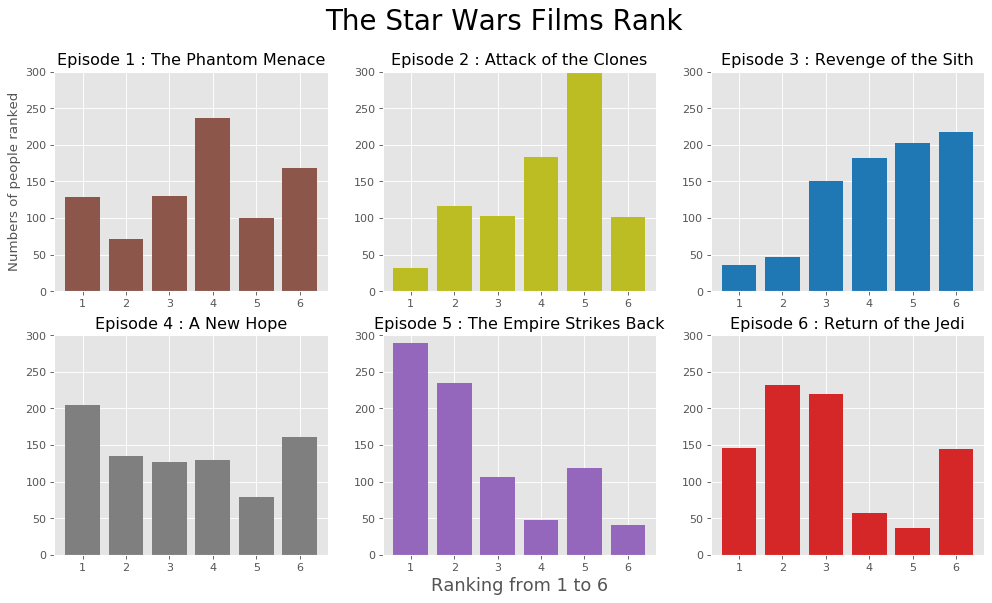

In [23]:
fig = plt.figure(num=2, figsize=(15, 8),dpi=80)
plt.style.use('ggplot')

ax1 = fig.add_subplot(2,3,1)
star_wars['ranking_1'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:brown')
ax1.set_xticklabels(range(1,7), rotation = 0)
ax1.set_ylim([0,300])
ax1.set_title('Episode 1 : The Phantom Menace')

plt.ylabel('Numbers of people ranked', size=12)

ax2 = fig.add_subplot(2,3,2)
star_wars['ranking_2'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:olive')
ax2.set_xticklabels(range(1,7),rotation = 0)
ax2.set_ylim([0,300])
ax2.set_title('Episode 2 : Attack of the Clones')


ax3 = fig.add_subplot(2,3,3)
star_wars['ranking_3'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:blue')
ax3.set_xticklabels(range(1,7),rotation = 0)

ax3.set_ylim([0,300])
ax3.set_title('Episode 3 : Revenge of the Sith')

ax4 = fig.add_subplot(2,3,4)
star_wars['ranking_4'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:grey')
ax4.set_xticklabels(range(1,7),rotation = 0)

ax4.set_ylim([0,300])
ax4.set_title('Episode 4 : A New Hope')

ax5 = fig.add_subplot(2,3,5)
star_wars['ranking_5'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:purple')
ax5.set_xticklabels(range(1,7),rotation = 0)
ax5.set_ylim([0,300])
ax5.set_xlabel('Ranking from 1 to 6', size=16)
ax5.set_title('Episode 5 : The Empire Strikes Back')

ax6 = fig.add_subplot(2,3,6)
star_wars['ranking_6'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:red')
ax6.set_xticklabels(range(1,7),rotation = 0)
ax6.set_ylim([0,300])
ax6.set_title('Episode 6 : Return of the Jedi')


fig.suptitle('The Star Wars Films Rank',size = 25)
ax6.grid(True)
ax5.grid(True)
ax4.grid(True)
ax3.grid(True)
ax2.grid(True)
ax1.grid(True)

plt.savefig("star_wars.png")
plt.show()

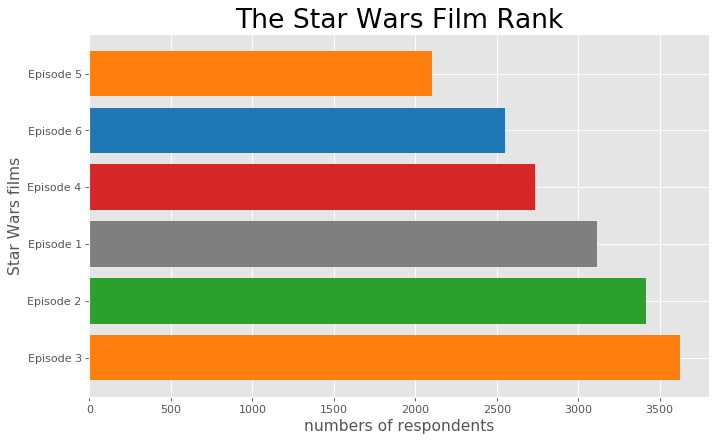

In [24]:
fig = plt.figure(num=2, figsize=(10, 6),dpi=80)

plt.barh(range(1,7),star_wars[star_wars.columns[9:15]].sum().sort_values(ascending=False),color=('tab:orange', 'tab:green', 'tab:grey','tab:red','tab:blue'))
plt.yticks(range(1,7),('Episode 3', 'Episode 2', 'Episode 1', 'Episode 4', 'Episode 6','Episode 5'))
plt.title('The Star Wars Film Rank',size = 24)
plt.ylabel('Star Wars films',size=14)
plt.xlabel('numbers of respondents',size=14)
plt.grid(True)
#plt.yticklables(['3','2','1','4','6','5'])

### Analysis
Review means and distribtuions for the columns on whether an episode was seen and its ranking.

Episode IX was watched the least, maybe due to its publication year dating way back.

However, we can conclude that each episode had been watched by similar percentage of respondents.

Episode III received the most negative feedbacks.

Episode V received the the most positive feedbacks.

Episode IV received polarizing feedbacks, with large numbers of respondents scoring it at either 1 (best) or 6 (worst)

In [25]:
star_wars['numbers_viewed'] = star_wars['seen_1'] + star_wars['seen_2'] + star_wars['seen_3']+ star_wars['seen_4']+ star_wars['seen_5'] + star_wars['seen_6']
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Gender,Age,Household Income,Education,Location (Census Region),numbers_viewed
1,3.292880e+09,True,True,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,Male,18-29,NaN,High school degree,South Atlantic,6
2,3.292880e+09,False,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,0
3,3.292765e+09,True,False,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,18-29,"$0 - $24,999",High school degree,West North Central,3
4,3.292763e+09,True,True,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,6
5,3.292731e+09,True,True,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,2.0,NaN,1.0,0.0,2.0,1.0,1.0,NaN,1.0,1.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,6


In [0]:
#further analysis by segments
#does the respondent consider himself as a fan?
movies = ['seen_{0}'.format(i) for i in range(1,7)]

fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [0]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [28]:
fans_male = fans[fans['Gender'] == 'Male']
fans_male.shape

(303, 35)

In [29]:
fans_female = fans[fans['Gender'] == 'Female']
fans_female.shape

(238, 35)

In [30]:
viewed_all = star_wars[star_wars['numbers_viewed'] == 6]
viewed_none = star_wars[star_wars['numbers_viewed'] == 0]
print(viewed_all.shape)
viewed_none.shape

(471, 35)


(351, 35)

Text(0.5, 1.0, 'Fans % Watched')

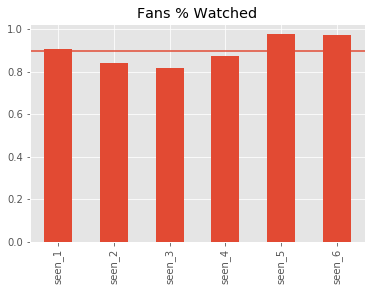

In [31]:


#calculate the percentage of fans who have watched respective episodes and the average across all episodes
fan_perc_viewed = fans[movies].sum() / len(fans[movies])
fan_perc_viewed.plot.bar()
plt.axhline(fan_perc_viewed.mean())
plt.title('Fans % Watched')

Text(0.5, 1.0, 'Non_Fans % Watched')

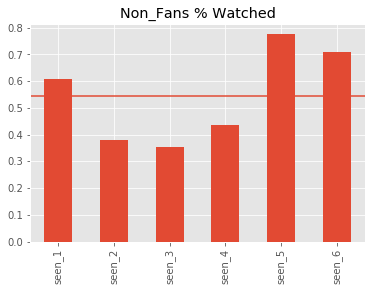

In [32]:

Non_fan_perc_viewed = non_fans[movies].sum() / len(non_fans[movies])
Non_fan_perc_viewed.plot.bar()
plt.axhline(Non_fan_perc_viewed.mean())
plt.title('Non_Fans % Watched')


In [33]:
viewed_all['Age'].value_counts()

30-44    141
18-29    129
45-60    121
> 60      72
Name: Age, dtype: int64

In [34]:
viewed_none['Age'].value_counts()

> 60     77
30-44    61
45-60    51
18-29    38
Name: Age, dtype: int64

In [35]:
fans['numbers_viewed'].value_counts()

6    411
4     48
3     38
5     32
2     16
1      7
Name: numbers_viewed, dtype: int64

In [36]:
non_fans['numbers_viewed'].value_counts()

2    69
3    61
6    60
1    49
4    24
5    20
0     1
Name: numbers_viewed, dtype: int64

Fans watched almost all the six episodes

Non-fans watched mostly Episode I, IV, and V

In [0]:

ranking_score_mapping = {
    1: 15,
    np.nan: 0,
    2: 10,
    3: 4,
    4: 2,
    5: 1,
    6: 0
}

for col in star_wars.columns[9:15]:
    star_wars[col] = star_wars[col].map(ranking_score_mapping)
  

In [38]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Gender,Age,Household Income,Education,Location (Census Region),numbers_viewed
1,3.292880e+09,True,True,1,1,1,1,1,1,4,10,15,2,1,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,Male,18-29,NaN,High school degree,South Atlantic,6
2,3.292880e+09,False,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,0
3,3.292765e+09,True,False,1,1,1,0,0,0,15,10,4,2,1,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,18-29,"$0 - $24,999",High school degree,West North Central,3
4,3.292763e+09,True,True,1,1,1,1,1,1,1,0,15,10,2,4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,6
5,3.292731e+09,True,True,1,1,1,1,1,1,1,2,0,10,15,4,2.0,1.0,1.0,NaN,2.0,NaN,1.0,0.0,2.0,1.0,1.0,NaN,1.0,1.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,6


In [39]:
star_wars[star_wars.columns[9:15]].sum()

ranking_1    3739
ranking_2    2718
ranking_3    2177
ranking_4    5257
ranking_5    7321
ranking_6    5540
dtype: int64

In [40]:
pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.1.1)


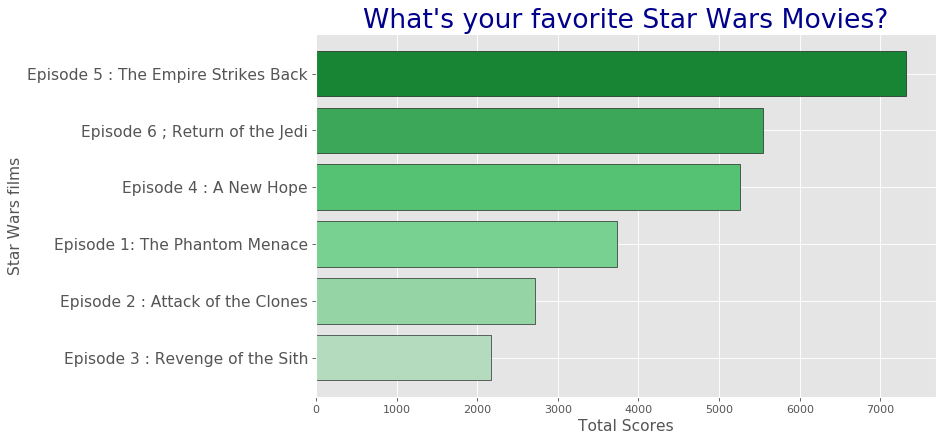

In [41]:
fig = plt.figure(num=2, figsize=(10, 6),dpi=80)
plt.style.use('ggplot')

plt.barh(range(1,7),star_wars[star_wars.columns[9:15]].sum().sort_values(ascending=True),color=('#b4dbbe', '#94d4a5', '#79d191','#55c273','#3ca659','#188535'), edgecolor='black')
plt.yticks(range(1,7),('Episode 3 : Revenge of the Sith', 'Episode 2 : Attack of the Clones', 'Episode 1: The Phantom Menace', 'Episode 4 : A New Hope', 'Episode 6 ; Return of the Jedi','Episode 5 : The Empire Strikes Back'),size=14)
plt.title("What's your favorite Star Wars Movies?",size = 24,color='darkblue')
plt.ylabel('Star Wars films',size=14)
plt.xlabel('Total Scores',size=14)
plt.grid(True)
#plt.yticklables(['3','2','1','4','6','5'])



In [49]:
char = star_wars.columns[15:29]
charactors = star_wars[char]
charactors.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0
5,2.0,1.0,1.0,NaN,2.0,NaN,1.0,0.0,2.0,1.0,1.0,NaN,1.0,1.0


In [62]:
c = charactors.sum().sort_values()
df = pd.DataFrame(c,columns=['Scores'])
df

,Scores
Jar Jar Binks,354.0
Emperor Palpatine,363.0
Boba Fett,429.0
Lando Calrissian,507.0
Padme Amidala,519.0
Anakin Skywalker,759.0
Darth Vader,791.0
C-3P0,1177.0
Princess Leia Organa,1304.0
R2 D2,1309.0


([<matplotlib.axis.YTick at 0x7f0257d28940>,
 <a list of 14 Text yticklabel objects>)

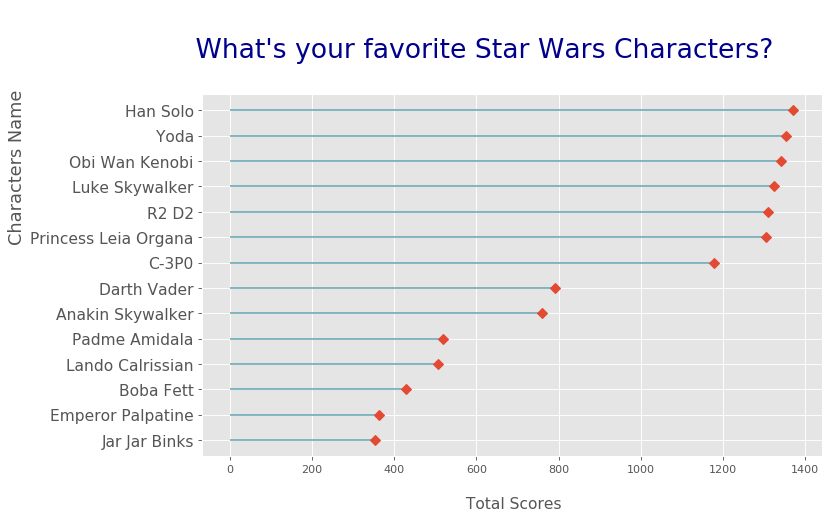

In [93]:
import seaborn as sns
fig = plt.figure(num=2, figsize=(10, 6),dpi=80)
my_range=range(1,len(df.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=df['Scores'], color='#70aab8')
plt.plot(df['Scores'], my_range, "D")
plt.xlabel('\n Total Scores',size=14)
plt.ylabel('Characters Name',size=16,y=0.8)
plt.title("\n What's your favorite Star Wars Characters?\n",size = 24,color='darkblue',x=0.45,y=1)
plt.yticks(my_range, ['Jar Jar Binks','Emperor Palpatine','Boba Fett','Lando Calrissian','Padme Amidala','Anakin Skywalker','Darth Vader','C-3P0','Princess Leia Organa','R2 D2','Luke Skywalker','Obi Wan Kenobi','Yoda','Han Solo'],size = 14)